# **`Catboost`**

## __CatBoost__
CatBoost is a `high-performance open-source gradient `boosting library that excels in `handling categorical features`, providing robust and efficient machine learning models with minimal hyperparameter tuning. 

Its advantages include built-in support for categorical variables, strong performance, and ease of use in a variety of applications

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from catboost import CatBoostRegressor , CatBoostClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
# Dataset load titanic using sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Pre-Processing 


In [4]:
# ChecK missing values 
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [8]:
# Impute missing value with KNN imputer column age
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])

# impute embarked missing values using embarked and embarked_town
df['embarked'] = df['embarked'].fillna(df.embarked.mode()[0])
df['embark_town'] = df['embark_town'].fillna(df.embark_town.mode()[0])
# drop deck column
df.drop('deck', axis=1, inplace=True)

# df missing values
df.isnull().sum().sort_values(ascending=False)



survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
# Check all information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [11]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [22]:
# convert each category column to category and object column to category
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# add this as a new column in the dataframe
df[categorical_cols] = df[categorical_cols].astype('category')

# Check the Categorical info
df[categorical_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    category
 1   embarked     891 non-null    category
 2   class        891 non-null    category
 3   who          891 non-null    category
 4   embark_town  891 non-null    category
 5   alive        891 non-null    category
dtypes: category(6)
memory usage: 6.1 KB


In [23]:
# split data into X and y
X = df.drop('survived', axis=1)
y = df['survived']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# run the catboost classifier
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=3,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           random_seed=42,
                           verbose=False)

# train the model
model.fit(X_train, y_train, cat_features=categorical_cols.tolist())

# predictions
y_pred = model.predict(X_test)

# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



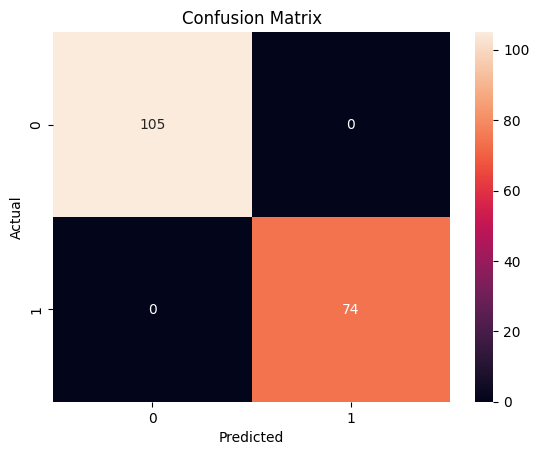

In [26]:
# plot the confuision matrix using sns 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()